<a href="https://colab.research.google.com/github/meirarc/Simple-Web-Scraping-Python-in-Google-Colab/blob/main/Simple_Web_Scraping_using_BeautifulSoup_and_Python_in_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Web Scraping using BeautifulSoup and Python in Google Colab

Hello everyone ! welcome to my first post ever on Medium. I’m currently taking Data Science path at Codecademy, and just now I thought “Well, I want to write something about what I learned at Codecademy”, hence the post. Actually I have some topics that I want to write and post before, but I decided on this topic since I want to make Medium as a witness on my journey. Let’s begin !

This Notebook was create using the base of the Medium post below to test Google Colab: 

https://nathanaelvictorious.medium.com/simple-web-scraping-using-beautifulsoup-and-python-in-google-colab-4084be701851

## Importing necessary library

First thing we need to do is obviously to import the library needed, such as BeautifulSoup, requests, pandas, matplotlib, and numpy. (If you are using Visual Studio Code, PyCharm, Jupyter Notebook or etc. You can install the library first using pip command, click the link(s) for more guide !)

Each library served it’s own function, BeautifulSoup for.. well scraping website, requests for getting the URL, pandas for it’s powerful yet flexible data structure DataFrame, matplotlib for visualizing the data, and numpy for list computing & analytics.

Now with all the library installed and imported, forward to the next step !

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Get the website & extracting the data

The snippet above let us to save the URL into a requests.models.Response variable called “webpage” using the requests library, and then we use the BeautifulSoup to get the content of the website using html.parser into a variable called “soup”. By the way, I use Codecademy website as the source, it’s a simple website about Cocoa Ratings in the world. You can check the website here.

In [4]:
#Fetch a website URL and store it to webpage
webpage = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")

In [5]:
#Take the webpage variable and fetch the content using BeautifulSoup
soup = BeautifulSoup(webpage.content, "html.parser")

## Understanding the structure of the website

Before you jump in to the extraction, you must first understand the structure of the website you want to scrap by inspect the page. You can see the HTML by right clicking and choose inspect (or press CTRL + Shift + I) on the website page, then we will see the image below on our screen.

If you having a hard time understanding the HTML structure you can learn the basic here.

In the image above you can see that every table data (<td>) in table row (<tr>) have their own classes, such as “Company”, “Origin”, “ReviewDate”, etc. From here I assume you already got the gist of the website component, obviously we are going to extract all the table data on <tr> and <td> element tags. See the code below for extracting data from the website

In [21]:
#Store the whole text in HTML that have the class "Rating" and "CocoaPercent"
company_column = soup.find_all(attrs={"class":"Company"})
rating_column = soup.find_all(attrs={"class": "Rating"})
cocoa_percent_tags = soup.find_all(attrs={"class": "CocoaPercent"})

Here we use the .find_all function on the soup variable that we declared before, this soup variable has the content of the website so we need to find what we need. In the code you can change the "class" to any HTML tags like "id" and "class-name" to any specific class/id name that you want to find.

Next you make an empty list example_list = [] for containing the content of the loop after this. I use for loops in this case so, for every x (data) in example_column[1:] “Wait, why you add [1:] after the list name ?” Yes it was intended, as you can see the table row is started from the column name (Company, Specific Bean Origin, REF, etc.)

In [22]:
#Make a empty lists for Rating and CocoaPercent
company = []
ratings = []
cocoa_percents = []

and you don’t want your list to have the column name. Hence, we started from [1] (list indexing in Python starts from 0) and the colon after 1 means all the data from index 1 to n (n = the list size).

After the loop you want to insert every data on example_column to the example_list with the .append() function and float() is for changing the string value we got from x.get_text() to float.

Congratulations ! Now you can extract any data you want from any website using BeautifulSoup and Python. After all the long work extracting the data, here come the fun part, analyzing the data !

In [23]:
#Loop for inserting each table data to list
for x in rating_column[1:] :
  ratings.append(float(x.get_text()))

In [24]:
for x in company_column[1:] :
  company.append(x.get_text())

In [25]:
for td in cocoa_percent_tags[1:] :
  percent = float(td.get_text().strip('%'))
  cocoa_percents.append(percent)

## Analyzing the data

Okay now we arrive at the last part, first we need to see what is the data is telling us. We have 9 column, Company, Specific Bean Origin or Bar Name, REF, Review Date, Cocoa Percent, Company Location, Rating, Bean Type, and Broad Bean Origin.

Next we need to decide the question we want to ask, this time I want to find the correlation between Cocoa Percentage and Rating, after that I can make a prediction about how much Cocoa Percentage affect the Rating.

First we need to make the DataFrame using pandas to make things easier

In [26]:
#Combining both ratings and cocoa_percents list to a dictionary
data = {"Company": company, "Rating": ratings, "CocoaPercentage": cocoa_percents}

In [27]:
#Make a new Data Frame from data dictionary
df = pd.DataFrame.from_dict(data)

ratings and cocoa_percents are lists that I extract from the website before, each lists contains rating column and cocoa percentage column.

After that we use the function from numpy library called .polyfit()

In [28]:
#Find the fits using polyfit
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)

This function used in linear regression problems. Linear regression models the relationship between a dependent variable and an independent variable, obtaining a line that best fits the data. In this case the dependent variable is the Rating and the independent variable is the CocoaPercentage.

Now we going to use .poly1d() functions from numpy (again) that helps to define a polynomial function from .polyfit().

In [29]:
#Make the line polynomial function using poly1d
line_function = np.poly1d(z)

And then we plot the result using matplotlib

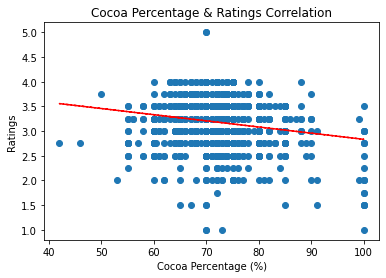

In [30]:
#Plotting the data
plt.scatter(df.CocoaPercentage, df.Rating)
plt.title('Cocoa Percentage & Ratings Correlation')
plt.xlabel('Cocoa Percentage (%)')
plt.ylabel('Ratings')
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.show()